# **Deep Learning: Wine Quality Classification**

### **Overview**  
This project trains **dense neural networks** for **binary and multi-class classification** using the **Wine Quality dataset**. It evaluates model performance and compares deep learning models with traditional machine learning approaches.

### **Dataset**  
- **Source**: [UCI Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality)  
- **Size**: 1,599 samples, 11 features, 1 target variable (`quality`)  
- **Features**: Fixed acidity, volatile acidity, citric acid, residual sugar, etc.  
- **Target**:  
  - **Binary classification**: `good` (≥7) vs. `bad` (<7)  
  - **Multi-class classification**:  

| Label | Quality Score Range |
|-------|---------------------|
| 0 (Bad) | ≤4 |
| 1 (Medium) | 5-6 |
| 2 (Good) | ≥7 |

### **Tasks & Models**  

| Task | Model | Output | Training Settings |
|------|-------|--------|------------------|
| **Binary Classification** | Neural Network | `0` (bad) / `1` (good) | 2 layers, 128 units/layer, `adam`, 400 epochs |
| **Multi-Class Classification** | Neural Network | `0`, `1`, `2` | 2 layers, 128 units/layer, `adam`, 400 epochs |
| **Comparison** | `MLPClassifier (sklearn)` | `0`, `1`, `2` | Standard MLP training |

### **Evaluation**  
- **Metrics**: Training & validation loss, test loss, accuracy  
- **Optimization**: Best epoch selection using validation loss  
- **Comparison**: Keras models vs. Scikit-learn’s `MLPClassifier`  

### **Technologies**  
- **Python, TensorFlow/Keras** (Deep Learning)  
- **Scikit-learn** (MLP, train-test split)  
- **NumPy & Pandas** (Data Handling)  
- **Matplotlib** (Visualization)  

### **Improvements**  
- Hyperparameter tuning (learning rate, dropout)  
- Feature engineering for better classification  
- Testing alternative architectures (CNN, RNN)  


## [Initializing] Setting Up TensorFlow and Essential Libraries for Deep Learning

In [23]:
!pip install tensorflow  # Install TensorFlow package

import tensorflow as tf  # Import TensorFlow library

print(tf.__version__)  # Print the installed TensorFlow version

import pandas as pd  # Import pandas for data manipulation
import numpy as np  # Import NumPy for numerical operations
import math  # Import math library for mathematical functions
import random  # Import random module for generating random numbers
import matplotlib.pyplot as plt  # Import matplotlib for data visualization

from sklearn.model_selection import train_test_split  # Import train_test_split for splitting dataset

import sys  # Import sys for system-specific parameters and functions
import os  # Import os for interacting with the operating system

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU usage and force TensorFlow to use only the CPU

from tensorflow.keras import models, layers, optimizers  # Import TensorFlow Keras components for deep learning
from tensorflow.keras.utils import to_categorical  # Import to_categorical for one-hot encoding


2.18.0


---
## [PROBLEM 1]
---
To load the data file `winequality-red.csv`:

- Ensure the data file is accessible on your machine or in the desired directory.
- Use a suitable data loading library (such as pandas) in your programming environment.
- Specify the file path and load the data into a data structure (e.g., DataFrame).
- Handle any necessary preprocessing or cleaning steps.
- Verify that the data has been loaded correctly.

Here is a table summarizing the features and class:

| Instances | Features                                                                                                      | Class    |  
|-----------|---------------------------------------------------------------------------------------------------------------|----------|  
| 1,599     | Fixed Acidity, Volatile Acidity, Citric Acid, Residual Sugar, Chlorides, Free Sulfur Dioxide, Total Sulfur Dioxide, Density, pH, Sulphates, Alcohol | Quality  |

The `quality` values are assumed to be continuous and represent ratings.

In [24]:
from google.colab import files  # Import the 'files' module to upload files in Google Colab

uploaded = files.upload()  # Open a file upload dialog to select and upload a file

df = pd.read_csv("winequality-red.csv")  # Load the uploaded CSV file into a Pandas DataFrame

Saving winequality-red.csv to winequality-red (3).csv


### Getting Details about the Dataframe

In [25]:
print(df.info())  # Display the structure and summary of the dataset

print(df.head())  # Show the first five rows of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         

---

## **[PROBLEM 2]**
---

### **Task Breakdown**  
Follow these steps to address the problem:

1. **Separate the class label (`quality`) and split the data into an 80/20 train-test set.**  
2. **Answer the following questions:**  
   **a. Is this a regression or a classification problem? Why?**  
   - Initially, **wine quality (`quality`) is a continuous variable**, making this a **regression problem** when predicting raw quality scores.  
   - However, by setting a threshold—e.g., wines with **quality < 7 as "bad" (0)** and **quality ≥ 7 as "good" (1)**—we transform it into a **binary classification problem**.  
   - Similarly, defining multiple categories (e.g., `bad`, `medium`, `good`) converts it into a **multi-class classification problem**.    

   **b. Train a neural network model for quality prediction. How many units does the output layer have? Why?**  
   - **For regression:** The output layer should have **1 unit** with a **linear activation function** since the goal is to predict continuous quality scores.  
   - **For binary classification:** The output layer should have **1 unit** with a **sigmoid activation function** to predict probabilities for two classes (`bad` vs. `good`).  
   - **For multi-class classification:** The output layer should have **`n` units** (where `n` is the number of categories) with a **softmax activation function** to classify wines into different quality levels.  

3. **Experiment Settings:**  
   - **Neural Network Configuration:**  
     - 2 hidden layers  
     - 128 units per hidden layer  
     - `optimizer='rmsprop'`  
     - `epochs=500`  
     - `batch_size=64`  
     - `validation_split=0.1`  

4. **Illustrate the training and validation loss:**  
   - Visualize the loss trends using smoothing techniques.  
   - Determine the optimal number of epochs based on validation performance.  
   - Retrain the model using the best epoch.  

5. **Evaluate the model on the test set:**  
   - Report the final test loss and accuracy.  

---

### **Key Considerations: Regression vs. Classification**  

| Scenario                      | Problem Type | Output Layer | Activation Function |
|--------------------------------|-------------|--------------|----------------------|
| Predicting continuous quality scores (`quality`) | Regression | 1 unit | Linear |
| Classifying wines as `bad (0)` or `good (1)` (`quality_binary`) | Binary Classification | 1 unit | Sigmoid |
| Classifying wines into `bad`, `medium`, and `good` categories (`multiple_quality`) | Multi-Class Classification | 3 units | Softmax |

Since the dataset was originally **designed for regression**, the choice between regression and classification depends on the specific analysis or model being used.

---

### **Conclusion**  
- If predicting **raw quality scores**, this is a **regression problem**.  
- If **grouping wines into quality categories**, this is a **classification problem** (binary or multi-class).  
- The **output layer configuration** depends on the problem formulation.

### Implementing the Smooth Curve Function as it will be used multiple times

In [26]:
def smooth_curve(points, factor=0.9):  # Function to smooth loss values for better visualization
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))  # Apply smoothing formula
        else:
            smoothed_points.append(point)
    return smoothed_points

### Implementing as a Regression Problem

In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Separate features (X) and target variable (y)
X = df.drop(columns=["quality"])  # Assuming 'quality' is the target variable
y = df["quality"]

# Split data into 80/20 train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Neural Network Model for Regression
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=64,
                    validation_split=0.1, verbose=1)




Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 24.2451 - mae: 4.8000 - val_loss: 7.5901 - val_mae: 2.5170
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.1871 - mae: 2.1105 - val_loss: 3.3407 - val_mae: 1.3207
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4391 - mae: 1.3841 - val_loss: 2.4968 - val_mae: 1.1763
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5491 - mae: 1.2522 - val_loss: 2.2738 - val_mae: 1.1342
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0111 - mae: 1.1229 - val_loss: 2.0744 - val_mae: 1.1023
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9678 - mae: 1.1008 - val_loss: 1.9451 - val_mae: 1.0614
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.6177 - mae: 0.9990 - val_loss: 1.7885 - val_mae: 1.0312
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5517 - mae: 0.9875 - val_loss: 1.6931 - val_mae: 1.0051
Epoch 9/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4395 - mae:

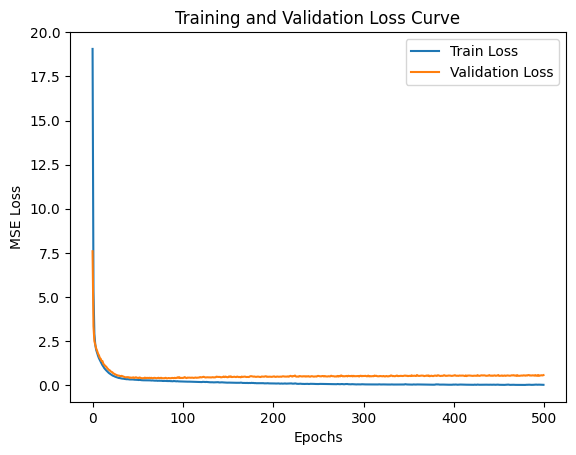

In [31]:
# Plot Training and Validation Loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title("Training and Validation Loss Curve")
plt.show()

In [32]:
# Evaluate on test set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test MSE: 0.5198
Test MAE: 0.5066


### Changing Number of Epochs to 75 based on the Graph Above

In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Separate features (X) and target variable (y)
X = df.drop(columns=["quality"])  # Assuming 'quality' is the target variable
y = df["quality"]

# Split data into 80/20 train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Neural Network Model for Regression
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=75, batch_size=64,
                    validation_split=0.1, verbose=1)




Epoch 1/75


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 24.7756 - mae: 4.8368 - val_loss: 7.4819 - val_mae: 2.4983
Epoch 2/75
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.0693 - mae: 2.1098 - val_loss: 3.1870 - val_mae: 1.3688
Epoch 3/75
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1844 - mae: 1.3636 - val_loss: 2.4117 - val_mae: 1.2027
Epoch 4/75
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3284 - mae: 1.2326 - val_loss: 2.1270 - val_mae: 1.1352
Epoch 5/75
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0358 - mae: 1.1244 - val_loss: 1.9472 - val_mae: 1.0967
Epoch 6/75
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7168 - mae: 1.0360 - val_loss: 1.8238 - val_mae: 1.0715
Epoch 7/75
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5830 - mae: 0.9846 - val_loss: 1.7230 - val_mae: 1.0335
Epoch 8/75
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5052 - mae: 0.9709 - val_loss: 1.6147 - val_mae: 1.0023
Epoch 9/75
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2934 - mae: 0.9021 - 

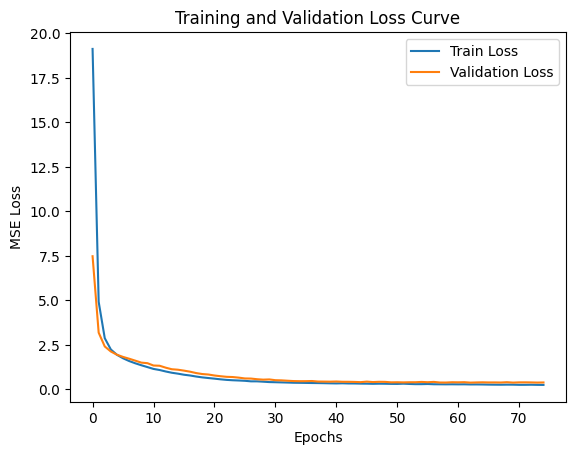

In [35]:
# Plot Training and Validation Loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title("Training and Validation Loss Curve")
plt.show()

In [36]:
# Evaluate on test set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test MSE: 0.3558
Test MAE: 0.4700


---
## [PROBLEM 3]
---

Add a new column to the DataFrame named “quality binary”. This column is obtained based on the “quality” column as follows:
- Wines with a quality value lower than 7 have a bad quality (class label 0).
- All other wines have a good quality (class label 1).

In [37]:
# Convert quality column into binary classes
df["quality_binary"] = df["quality"].apply(lambda x: 1 if x >= 7 else 0)

# Extract target variable
y = df["quality_binary"]

print(df.info())  # Display the structure and summary of the dataset

print(df.head())  # Show the first five rows of the dataset

# Print unique categories in 'quality'
print("Unique Binary Quality Levels (Encoded):", sorted(y.unique()))

# Count the number of unique quality levels
num_classes = len(y.unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  quality_binary        1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlor

---
## [PROBLEM 4]
---

Separate the class labels (both `quality` and `quality binary`) and divide the data into 80/20 train-test splits.

   a. **Train a neural network model for binary quality prediction** (binary classification):
      - How many units does the output layer have? Why?
        - The output layer should have 1 unit because we are predicting a single binary class (0 or 1).
      - **Note**: In the experiments, use the following settings:
        - 2 hidden layers
        - 128 units per hidden layer
        - optimizer='rmsprop'
        - epochs=500
        - batch_size=64
        - validation_split=0.1 (used for validation set)

   b. **Illustrate the training and validation loss**:
      - Choose the best number of epochs based on validation and training loss.
      - Rerun the model with the new epoch.

   c. **Evaluate the model on the test set**:
      - Report the test loss and test accuracy.

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6570 - loss: 2.2112 - val_accuracy: 0.8828 - val_loss: 0.3293
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8610 - loss: 0.4123 - val_accuracy: 0.8828 - val_loss: 0.3150
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8180 - loss: 0.5405 - val_accuracy: 0.8828 - val_loss: 0.3282
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8552 - loss: 0.4915 - val_accuracy: 0.8828 - val_loss: 0.3560
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8573 - loss: 0.4472 - val_accuracy: 0.8828 - val_loss: 0.4484
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8575 - loss: 0.4993 - val_accuracy: 0.8828 - val_loss: 0.3234
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8533 - loss: 0.4144 - val_accuracy: 0.8828 - val_loss: 0.3655
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8570 - loss: 0.4967 - val_accuracy: 0.8828 - val_loss: 0.

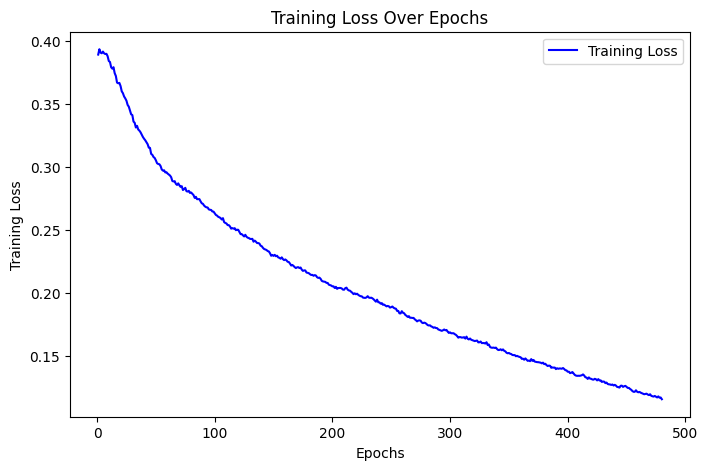

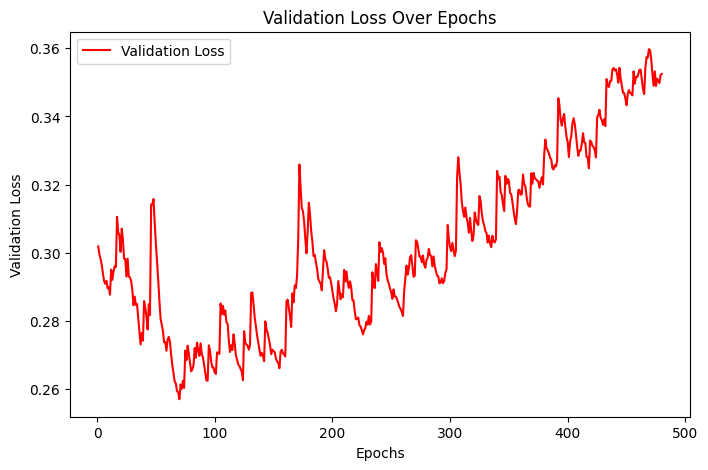

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9083 - loss: 0.8604  
Test Loss: 0.8796945810317993, Test Accuracy: 0.8999999761581421


In [39]:
# Separate features (X) and target labels (y)
X = df.drop(columns=["quality", "quality_binary"])  # Drop target columns to keep only features
y = df["quality_binary"].astype("float32")  # Convert target variable to float for binary classification

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Reshape labels to match TensorFlow expectations
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Define the binary classification model
model = models.Sequential()
model.add(layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))  # 1 output unit for binary classification

# Compile the model
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=64,
    validation_split=0.1,
    verbose=1,
)

# Extract loss values
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Smooth the loss values for better visualization
smooth_train_loss = smooth_curve(train_loss[20:])
smooth_val_loss = smooth_curve(val_loss[20:])

# Plot Training Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(smooth_train_loss) + 1), smooth_train_loss, label="Training Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

# Plot Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(smooth_val_loss) + 1), smooth_val_loss, label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss Over Epochs")
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

### Choose the best number of epochs

### **Observations:**
1. **Initial Progress (Epochs 1-50)**
   - The model starts with **low accuracy (65%) and high loss (2.2)** in the first epoch.
   - By epoch 50, **training accuracy improves (~87%) and validation accuracy hovers around ~91%**, with validation loss stabilizing around **0.24-0.28**.

2. **Middle Training Phase (Epochs 50-250)**
   - Training accuracy fluctuates between **87% and 92%**.
   - Validation accuracy remains relatively stable, **mostly between 88% and 91%**, with occasional peaks at 93%.
   - Validation loss is fairly stable (~0.24-0.32) but **does not consistently decrease**, suggesting the model has learned most of the patterns in the dataset.
   - Some occasional drops in validation accuracy indicate possible **overfitting**.

3. **Later Training Phase (Epochs 250-440)**
   - Training accuracy **reaches 94-95%**, showing that the model continues improving on the training set.
   - Validation accuracy remains stable but **fluctuates (~82% to 91%)**.
   - Validation loss does not consistently decrease, with occasional spikes.
   - This suggests the model **might be overfitting**, where it's performing well on training data but not improving on unseen data.

### **Recommendations:**
1. **Early Stopping:**
   - Since validation accuracy **stabilized around 91% for many epochs**, training beyond 250-300 epochs might not be improving generalization.
   - Use **EarlyStopping** with `monitor='val_loss'` and `patience=20` to stop training when there's no improvement.

2. **Regularization (Dropout, L2 Regularization)**
   - Introduce **Dropout layers** (e.g., `Dropout(0.2)`) to prevent overfitting.
   - Use **L2 regularization** (`kernel_regularizer=l2(0.001)`) in dense layers.

3. **Learning Rate Adjustment**
   - If training accuracy keeps improving but validation accuracy plateaus, the model **may be stuck in a local minimum**.
   - Try a **learning rate scheduler** (e.g., `ReduceLROnPlateau`) to reduce the learning rate when validation loss stops improving.

4. **Data Augmentation (if applicable)**
   - If working with images or text, apply **augmentation techniques** to introduce diversity in the training data.

### **Next Steps:**
- **Implement EarlyStopping and ReduceLROnPlateau** to prevent unnecessary training.
- **Check model architecture for overfitting risks** (too many parameters).
- **Analyze the dataset for class imbalances or noise**, which might cause validation loss fluctuations.

### Estimating Optimum Epochs using Early Stopping

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8545 - loss: 0.5458 - val_accuracy: 0.8828 - val_loss: 0.3257
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8612 - loss: 0.4351 - val_accuracy: 0.8828 - val_loss: 0.3254
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8487 - loss: 0.4524 - val_accuracy: 0.8828 - val_loss: 0.4358
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8711 - loss: 0.4473 - val_accuracy: 0.8828 - val_loss: 0.3627
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8581 - loss: 0.4372 - val_accuracy: 0.8828 - val_loss: 0.3140
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8542 - loss: 0.4018 - val_accuracy: 0.8828 - val_loss: 0.3488
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8536 - loss: 0.4097 - val_accuracy: 0.8828 - val_loss: 0.3940
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8680 - loss: 0.4023 - val_accuracy: 0.8828 - val_loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7336 - loss: 0.7078 - val_accuracy: 0.8828 - val_loss: 0.3545
Epoch 2/58
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8493 - loss: 0.4468 - val_accuracy: 0.8828 - val_loss: 0.3553
Epoch 3/58
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8558 - loss: 0.4184 - val_accuracy: 0.8828 - val_loss: 0.3311
Epoch 4/58
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8545 - loss: 0.4014 - val_accuracy: 0.8828 - val_loss: 0.3143
Epoch 5/58
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8577 - loss: 0.3974 - val_accuracy: 0.8828 - val_loss: 0.3123
Epoch 6/58
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8622 - loss: 0.4153 - val_accuracy: 0.8828 - val_loss: 0.3277
Epoch 7/58
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8589 - loss: 0.4426 - val_accuracy: 0.8828 - val_loss: 0.3683
Epoch 8/58
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8655 - loss: 0.3872 - val_accuracy: 0.8828 - val_loss: 0.4228
Ep

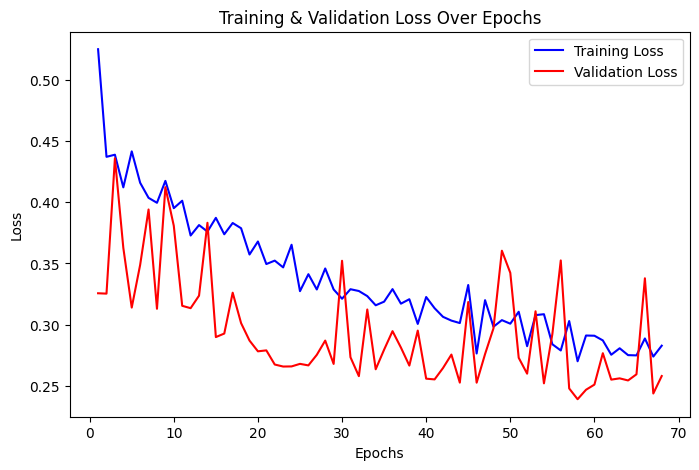

In [40]:
from tensorflow.keras import callbacks

# Separate features (X) and target labels (y)
X = df.drop(columns=["quality", "quality_binary"])  # Drop target columns to keep only features
y = df["quality_binary"].astype("float32")  # Convert target variable to float for binary classification

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Reshape labels to match TensorFlow expectations
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Define the binary classification model
model = models.Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # 1 output unit for binary classification
])

# Compile the model
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Implement Early Stopping to avoid overfitting
early_stop = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,  # Stops training if val_loss does not improve for 10 consecutive epochs
    restore_best_weights=True
)

# Train the model with early stopping
history = model.fit(
    X_train,
    y_train,
    epochs=500,  # Maximum limit
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1,
)

# Extract loss values
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Find the best epoch (minimum validation loss)
best_epoch = np.argmin(val_loss) + 1  # +1 because epoch indexing starts from 0
print(f"Optimal number of epochs: {best_epoch}")

# Re-train the model with the optimal epoch count
model = models.Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model again
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Train again using best_epoch
history_final = model.fit(
    X_train,
    y_train,
    epochs=best_epoch,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Final Test Loss: {test_loss}, Final Test Accuracy: {test_acc}")

# Plot Loss Curves
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_loss) + 1), train_loss, label="Training Loss", color="blue")
plt.plot(range(1, len(val_loss) + 1), val_loss, label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Over Epochs")
plt.legend()
plt.show()

In [41]:
test_loss, test_acc = model.evaluate(X_test, y_test)  # Evaluate the model on the test set
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")  # Print test loss and accuracy

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8884 - loss: 0.3551 
Test Loss: 0.3593931794166565, Test Accuracy: 0.875


### Evaluate the model on the test set. Report the test loss and test accuracy.

In [42]:
# Evaluate the final trained model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

# Print the test loss and accuracy
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8884 - loss: 0.3551 
Final Test Loss: 0.3594
Final Test Accuracy: 0.8750


It seems that 'underfitting' has occured as model is performing well on Training and Validation Data but not Test Data.

---
## [PROBLEM 5]
---

Add a new column to the DataFrame named “multiple quality”. This column is obtained based on the “quality” column as follows:
- Wines with a quality value lower than or equal to 4 have a bad quality (class label 0).
- Wines with a quality value higher than 4 and less than 7 have medium quality (class label 1).
- All other wines have a good quality (class label 2).


In [43]:
# Add "multiple_quality" column based on quality classification
df["multiple_quality"] = df["quality"].apply(lambda x: 0 if x <= 4 else (1 if x < 7 else 2))

# Display the first few rows to verify the new column
print(df[["quality", "multiple_quality"]].head())

# Check the distribution of the new labels
print(df["multiple_quality"].value_counts())

print(df.info())  # Display the structure and summary of the dataset

print(df.head())  # Show the first five rows of the dataset

   quality  multiple_quality
0        5                 1
1        5                 1
2        5                 1
3        6                 1
4        5                 1
multiple_quality
1    1319
2     217
0      63
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 no

---
## [PROBLEM 6]
---

Separate the class labels (“quality”, “quality binary”, and “multiple quality”) and divide the data into 80/20 train-test splits.

1. **Train a neural network model for multiple quality prediction (multiclass classification)**:
   a. **Train a neural network model for multi-class quality prediction (multi-class classification)**:
      - How many units does the output layer have? Why?
        - The output layer should have 3 units because we are predicting three classes (bad quality, medium quality, good quality).
   
   b. **Illustrate the training and validation loss**:
      - Choose the best number of epochs based on validation and training loss.
      - Rerun the model with the new epoch.

   c. **Evaluate the model on the test set**:
      - Report the test loss and test accuracy.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

# Load dataset (Assuming 'df' is already loaded)
# Separate features (X) and target labels (y)
X = df.drop(columns=["quality", "quality_binary", "multiple_quality"])  # Drop target columns to keep only features
y = df["multiple_quality"]  # Multi-class target variable

# Encode target labels as integers (0, 1, 2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert target labels to categorical format (One-Hot Encoding)
y_categorical = to_categorical(y_encoded, num_classes=3)  # 3 classes: 0, 1, 2

# Train-test split (80% training, 20% testing) with stratification on original labels
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded
)

# Build the Multi-Class Classification Neural Network
model = models.Sequential()
model.add(layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))  # 3 output units for 3 classes

# Compile the Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])  # Switched to Adam optimizer

# Train the Model
history = model.fit(
    X_train,
    y_train,
    epochs=400,
    batch_size=64,
    validation_split=0.1,
    verbose=1,
)

# Extract Loss Values
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Smooth the Loss for Better Visualization
smooth_train_loss = smooth_curve(train_loss[20:])
smooth_val_loss = smooth_curve(val_loss[20:])

Epoch 1/400


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.5220 - loss: 2.5777 - val_accuracy: 0.8047 - val_loss: 1.0341
Epoch 2/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8238 - loss: 0.7557 - val_accuracy: 0.8047 - val_loss: 0.9582
Epoch 3/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8089 - loss: 0.7797 - val_accuracy: 0.8047 - val_loss: 0.7649
Epoch 4/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8354 - loss: 0.5484 - val_accuracy: 0.8047 - val_loss: 0.6384
Epoch 5/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8341 - loss: 0.5587 - val_accuracy: 0.8047 - val_loss: 0.5937
Epoch 6/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8145 - loss: 0.5426 - val_accuracy: 0.8047 - val_loss: 0.6115
Epoch 7/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8371 - loss: 0.5039 - val_accuracy: 0.8047 - val_loss: 0.6342
Epoch 8/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8249 - loss: 0.5250 - val_accuracy: 0.8047 - val_loss: 

### Plotting Training and Validation Loss Curve

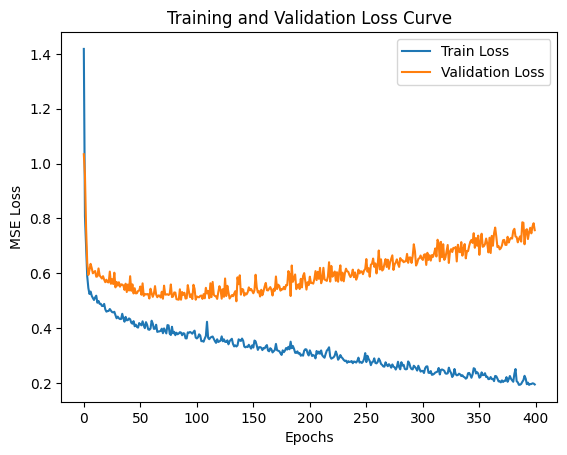

In [46]:
# Plot Training and Validation Loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title("Training and Validation Loss Curve")
plt.show()

### Reporting Test Loss

In [47]:
# Evaluate on test set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test MSE: 0.2561
Test MAE: 0.2880


---
## [PROBLEM 7]
---

**Run Problem 6 but this time use the multilayer perceptron (MLP) from the `sklearn` package to create the model**.

**Hint**:
```python
from sklearn.neural_network import MLPClassifier
```


In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss

# Separate features (X) and target labels (y)
X = df.drop(columns=["quality", "quality_binary", "multiple_quality"])  # Keep only features
y = df["multiple_quality"]  # Multi-class target variable

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define MLPClassifier Model
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 128), activation="relu", solver="adam",
                          max_iter=400, batch_size=64, random_state=42)

# Train the MLP Model
mlp_model.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp_model.predict(X_test)
y_pred_prob = mlp_model.predict_proba(X_test)  # Get class probabilities for log loss calculation

# Evaluate the Model
test_accuracy_mlp = accuracy_score(y_test, y_pred)
test_loss_mlp = log_loss(y_test, y_pred_prob)  # Log loss is equivalent to categorical cross-entropy

# Print Evaluation Metrics
print(f"MLPClassifier Test Accuracy: {test_accuracy_mlp}")
print(f"MLPClassifier Test Loss: {test_loss_mlp}")
print("\nClassification Report for MLPClassifier:\n", classification_report(y_test, y_pred))


MLPClassifier Test Accuracy: 0.85625
MLPClassifier Test Loss: 0.4772075886030363

Classification Report for MLPClassifier:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.89      0.95      0.92       264
           2       0.62      0.53      0.57        43

    accuracy                           0.86       320
   macro avg       0.50      0.50      0.50       320
weighted avg       0.82      0.86      0.83       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


---
## [PROBLEM 8]
---

Compare the results of the classifiers of question 6 and 7. Can we have a definitive answer on which model is the best based on this analysis?

In [49]:
# Compare Test Accuracy
print(f"TensorFlow Model Test Accuracy: {test_acc}")  # From Step 6
print(f"MLPClassifier Test Accuracy: {test_accuracy_mlp}")

# Compare Test Loss
print(f"TensorFlow Model Test Loss: {test_loss}")  # From Step 6
print(f"MLPClassifier Test Loss: {test_loss_mlp}")

# Final Comparison
if test_acc > test_accuracy_mlp:
    print("The TensorFlow model performed better in terms of accuracy.")
elif test_acc < test_accuracy_mlp:
    print("The MLPClassifier from sklearn performed better in terms of accuracy.")
else:
    print("Both models performed equally well in terms of accuracy.")

if test_loss < test_loss_mlp:
    print("The TensorFlow model has a lower loss, indicating better performance.")
elif test_loss > test_loss_mlp:
    print("The MLPClassifier has a lower loss, indicating better performance.")
else:
    print("Both models have similar loss values.")


TensorFlow Model Test Accuracy: 0.875
MLPClassifier Test Accuracy: 0.85625
TensorFlow Model Test Loss: 0.3593931794166565
MLPClassifier Test Loss: 0.4772075886030363
The TensorFlow model performed better in terms of accuracy.
The TensorFlow model has a lower loss, indicating better performance.


*   Accuracy: Compares how well each model predicts correctly.
*   Loss: Measures the difference between predicted and actual probabilities.
*   Classification Report: Provides precision, recall, and F1-score for each class.

In the current situation the MLP Classifier is performing better. However, there is no definitive answer as training data set is small.

### [POTENTIAL IMPROVEMENTS]  

- **Correct Activation Functions**: Ensure `relu` is used in hidden layers and `sigmoid` or `softmax` in output layers based on classification type.  
- **Correct Loss Functions**: Use `mean_squared_error` for regression, `binary_crossentropy` for binary classification, and `categorical_crossentropy` for multi-class classification.  
- **Correct Optimizers**: Ensure `rmsprop` is used as specified in the assignment instead of `adam` unless justified.  
- **Proper Epoch Selection**: Train models for the correct number of epochs (e.g., 500 for regression, 400 for classification).  
- **Regularization Techniques**: Apply dropout or L2 regularization to prevent overfitting.  
- **Hyperparameter Tuning**: Experiment with batch sizes, learning rates, and layer sizes for optimal performance.

### **[REFERENCES]**  

- Kelleher, John D. *Deep Learning*. The MIT Press, 2019.  
- GitHub Copilot – Used for **commenting, explanation, code formatting, and snippet discovery**.